# Desafio 1: Determinantes del ingreso

## Hito 1

### Preliminares

El objetivo de este ejercicio es desarrollar un modelo predictivo sobre la probabilidad de que un individuo presente salarios por sobre o bajo los 50000 dolares al año, en base a una serie de atributos socioeconomicos.

El desafio trata de un problema de **Clasificacion** para lo cual utilizare la ***Regresion Logistica***, y para validar el modelo me basare en las metricas Accuaracy, Precision y Recall.

### Aspectos Computacionales

A continuacion las librerias a utilizar seran:
   
    - warning: Para tener un notebook mas limpio y sin las alertas de deprecaion.
    - pandas: Libreria utilizada para el analisis de datos y lectura de archivos.
    - numpy: Libreria optimizada para el analisis de datos.
    - modulo stats: Modulo stats para realizar simulacion.
    - matplotlib: Libreria utilizada para realizar graficos
    - seborn : Libreria utilizada para realizar graficos de manera simple.
    - statsmodels: Liberia utilizada para realizar modelos.
    - func_analitics: Son las funciones creadas por mi para realizar la manipulacion de los datos.
    

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import func_analitics as fa #funciones de analisis

In [2]:
df_origin = pd.read_csv('income-db.csv')

In [3]:
df = df_origin.copy()

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### A continuacion realizare la recodificacion de las variables.

In [5]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
for columna in df.columns:
    df[columna] = np.where(df[columna]=='?', np.nan, df[columna])

In [7]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
df = df.replace(['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support'], 'white-collar')
df = df.replace(['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing',
                 'Protective-serv', 'Priv-house-serv'], 'blue-collar')
df = df.replace(['Other-service', 'Armed-Forces'], 'others')

In [9]:
df = df.replace(['Federal-gov'], 'federal-gov')
df = df.replace(['State-gov','Local-gov'], 'state-level-gov')
df = df.replace(['Self-emp-inc', 'Self-emp-not-inc'], 'self-employed')
df = df.replace(['Never-worked', 'Without-pay'], 'unemployed')

In [10]:
df = df.replace(['Preschool'],'preschool')
df = df.replace(['1st-4th', '5th-6th'], 'elementary-school')
df = df.replace(['7th-8th', '9th', '10th','11th', '12th', 'HS-grad'], 'high-school')
df = df.replace(['Assoc-voc', 'Assoc-acdm', 'Some-college'], 'college')
df = df.replace(['Bachelors', 'Masters', 'Prof-school', 'Doctorate'], 'university')

In [11]:
df = df.replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'married')
df = df.replace(['Divorced'], 'divorced')
df = df.replace(['Separated'], 'separated')
df = df.replace(['Widowed'], 'widowed')

In [12]:
df['marital-status'].value_counts()

married          23044
Never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: marital-status, dtype: int64

In [13]:
df.income = np.where(df['income']=='>50K', 1, 0)

In [14]:
df = df.replace(['United-States', 'Puerto-Rico', 'Canada', 'Cuba', 'Honduras', 'Mexico',
                              'Dominican-Republic', 'Jamaica', 'Ecuador', 'Haiti', 'Columbia', 'Guatemala', 
                              'Nicaragua', 'El-Salvador', 'Trinadad&Tobago', 'Peru'], 'america') 
df = df.replace(['England','Germany', 'Greece', 'Poland', 'France', 'Hungary', 'Holand-Netherlands', 'Yugoslavia',
           'Scotland', 'Ireland', 'Portugal', 'Italy'], 'europe')
df = df.replace(['Outlying-US(Guam-USVI-etc)'], 'oceania')
df = df.replace(['Cambodia', 'India', 'Japan', 'South', 'China', 'Iran', 'Philippines', 'Vietnam', 'Laos',
            'Taiwan', 'Thailand', 'Hong'], 'asia')

In [15]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,high-school,7.0,Never-married,blue-collar,Own-child,Black,Male,0.0,0.0,40.0,america,0
1,38.0,Private,89814.0,high-school,9.0,married,blue-collar,Husband,White,Male,0.0,0.0,50.0,america,0
2,28.0,state-level-gov,336951.0,college,12.0,married,blue-collar,Husband,White,Male,0.0,0.0,40.0,america,1
3,44.0,Private,160323.0,college,10.0,married,blue-collar,Husband,Black,Male,7688.0,0.0,40.0,america,1
4,18.0,NaN,103497.0,college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,america,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,college,12.0,married,white-collar,Wife,White,Female,0.0,0.0,38.0,america,0
48838,40.0,Private,154374.0,high-school,9.0,married,blue-collar,Husband,White,Male,0.0,0.0,40.0,america,1
48839,58.0,Private,151910.0,high-school,9.0,widowed,white-collar,Unmarried,White,Female,0.0,0.0,40.0,america,0
48840,22.0,Private,201490.0,high-school,9.0,Never-married,white-collar,Own-child,White,Male,0.0,0.0,20.0,america,0


In [16]:
df['native-country'].value_counts()

america    46086
asia        1096
europe       780
oceania       23
Name: native-country, dtype: int64

In [17]:
df = df.rename(columns = {'native-country':'region', 'occupation':'collars', 'education':'educ_recod',
                          'workclass':'workclass_recod','marital-status':'civstatus'})

### Tabla con los datos recodificados

In [18]:
df

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25.0,Private,226802.0,high-school,7.0,Never-married,blue-collar,Own-child,Black,Male,0.0,0.0,40.0,america,0
1,38.0,Private,89814.0,high-school,9.0,married,blue-collar,Husband,White,Male,0.0,0.0,50.0,america,0
2,28.0,state-level-gov,336951.0,college,12.0,married,blue-collar,Husband,White,Male,0.0,0.0,40.0,america,1
3,44.0,Private,160323.0,college,10.0,married,blue-collar,Husband,Black,Male,7688.0,0.0,40.0,america,1
4,18.0,NaN,103497.0,college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,america,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,college,12.0,married,white-collar,Wife,White,Female,0.0,0.0,38.0,america,0
48838,40.0,Private,154374.0,high-school,9.0,married,blue-collar,Husband,White,Male,0.0,0.0,40.0,america,1
48839,58.0,Private,151910.0,high-school,9.0,widowed,white-collar,Unmarried,White,Female,0.0,0.0,40.0,america,0
48840,22.0,Private,201490.0,high-school,9.0,Never-married,white-collar,Own-child,White,Male,0.0,0.0,20.0,america,0


# Hito 2

## Descripción

In [19]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [20]:
fa.inspeccion_previa(df)

                 workclass_recod
Private                    33906
self-employed               5557
state-level-gov             5117
federal-gov                 1432
unemployed                    31

                   educ_recod
high-school             21353
college                 14540
university              12110
elementary-school         756
preschool                  83

               civstatus
married            23044
Never-married      16117
divorced            6633
separated           1530
widowed             1518

              collars
white-collar    24819
blue-collar     16276
others           4938

                relationship
Husband                19716
Not-in-family          12583
Own-child               7581
Unmarried               5125
Wife                    2331
Other-relative          1506

                     race
White               41762
Black                4685
Asian-Pac-Islander   1519
Amer-Indian-Eskimo    470
Other                 406

        gender
Male

## Inspección Visual del Data Set

### Inspeccion Visual vector objetivo

In [21]:
df.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

Text(0.5, 0, '')

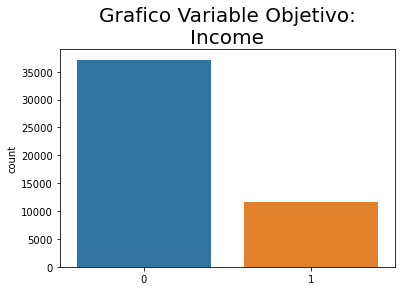

In [22]:
sns.countplot(x=df.income, data= df)
plt.title('Grafico Variable Objetivo:\nIncome', fontdict={'fontsize':20})
plt.xlabel('')

Se observa que mas de la mitad de las observaciones gana menos de 50000 dolares al año.

### A continuacion se realizara un histograma para cada variable continua del data set

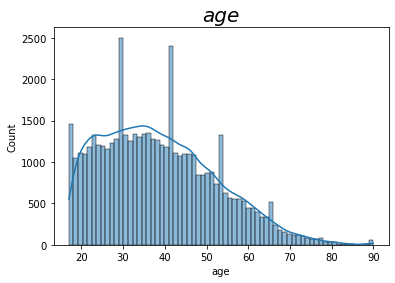

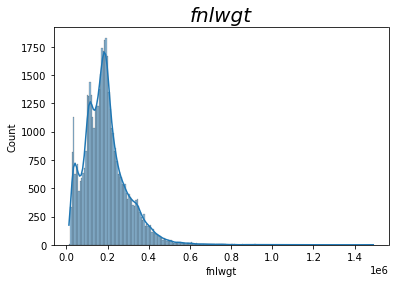

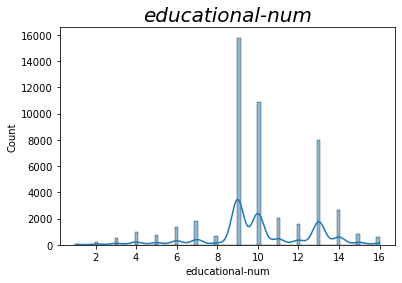

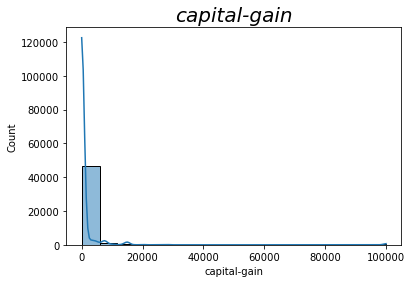

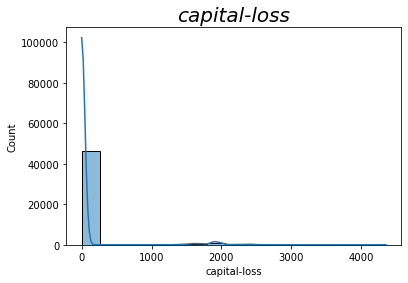

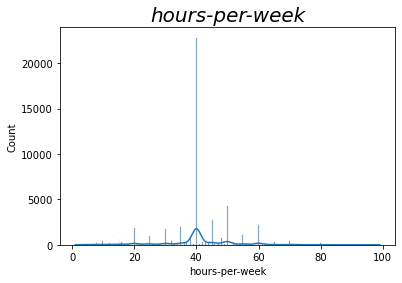

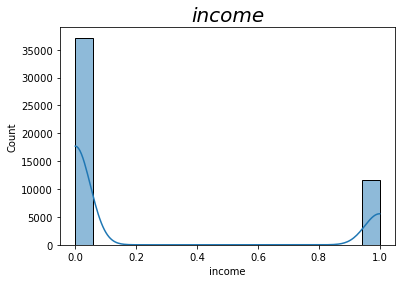

In [23]:
fa.histogramas(df)

Se observa que solo ***age*** tiene un comportamiento que se acerca más a la distribucion normal. 

### A continuacion el analisis de las variables categoricas del data set

Grafico de barras para variables categoricas

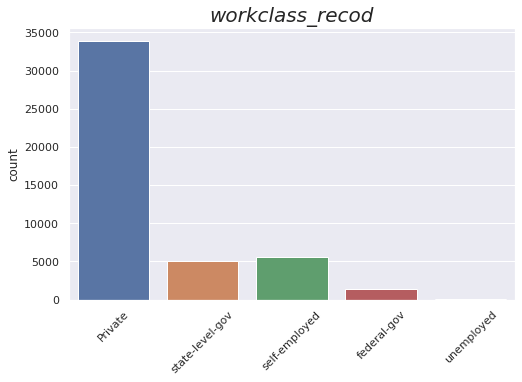

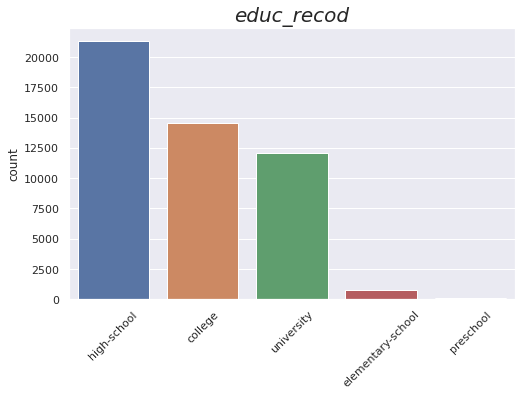

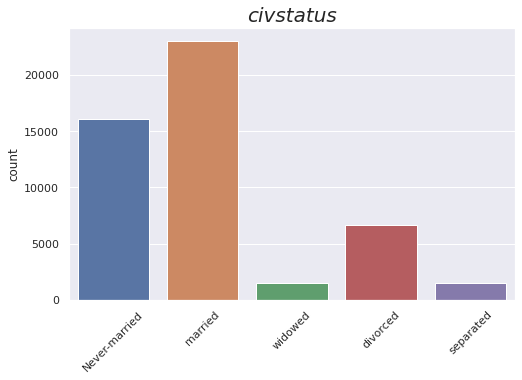

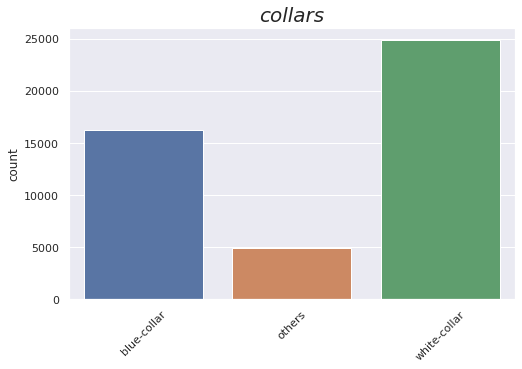

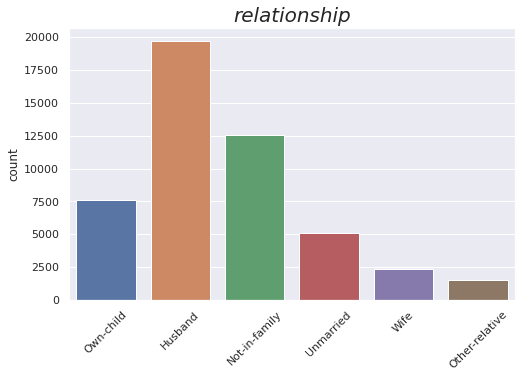

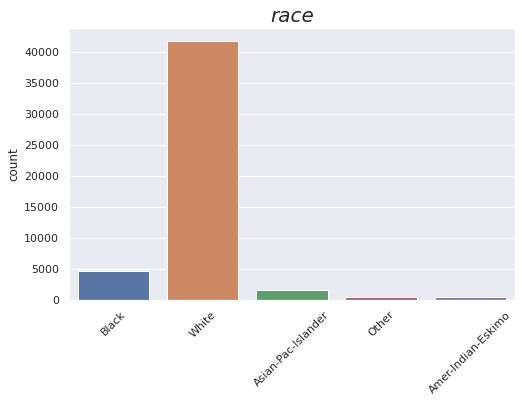

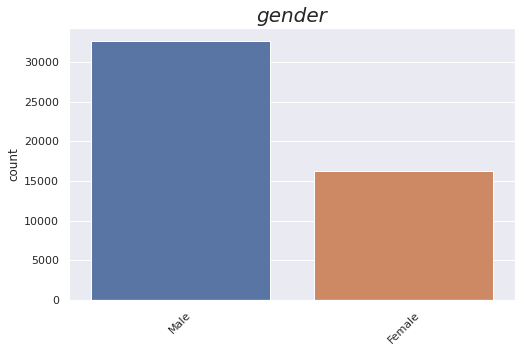

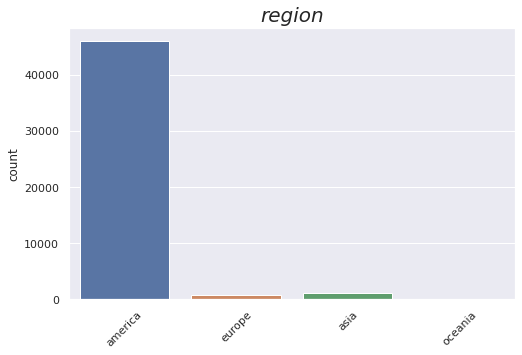

In [24]:
fa.grafico_barras(df)

### Heatmap para observar la correlacion de las variable.

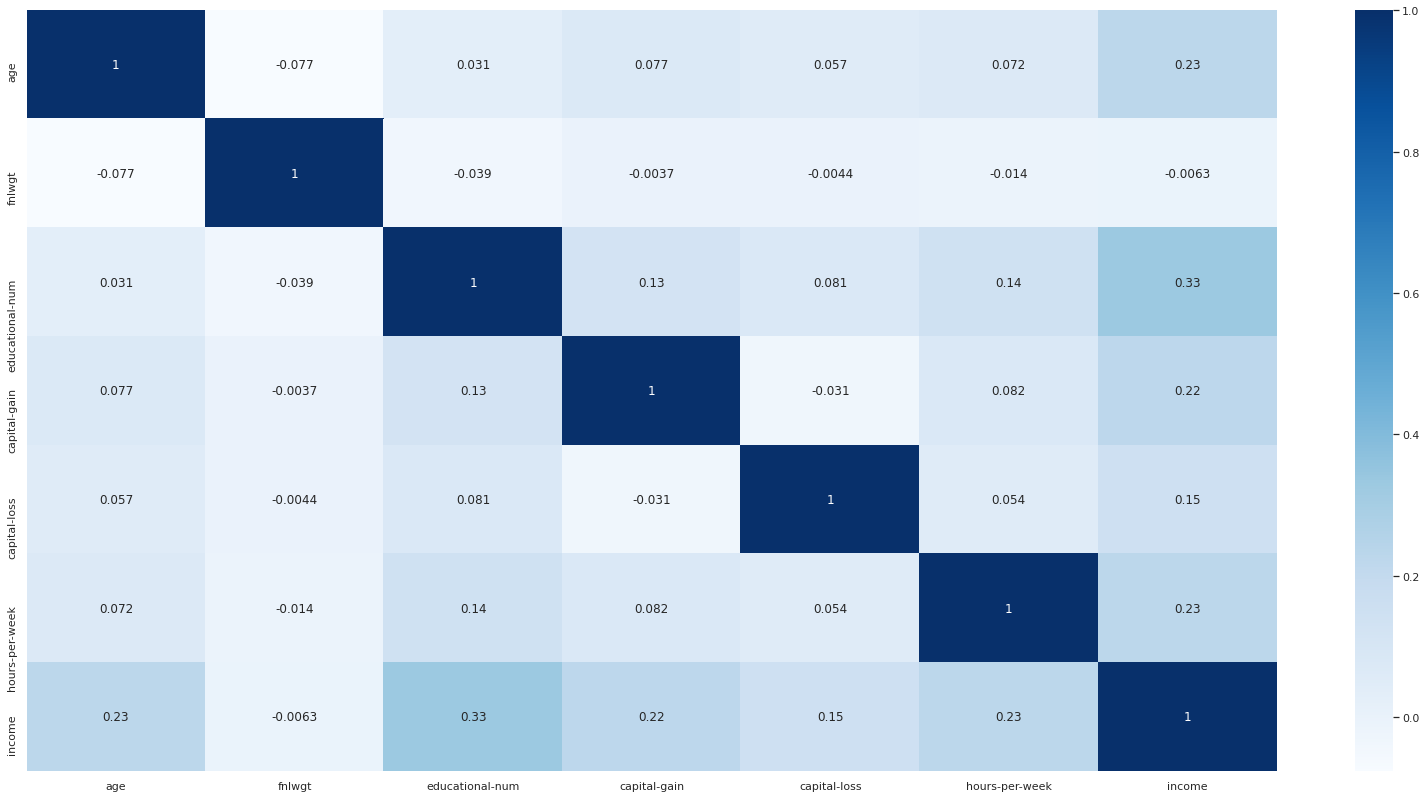

In [25]:
fa.heatmap_corr(df)

No se observa una correlacion importante en el grafico, pero hay que considerar que heatmap utiliza por defecto la correlacion de Pearson, que no tiene un buen desempeño con las variables no lineales.

### Analisis de datos perdidos.

In [26]:
df.isnull().sum().sort_values(ascending = False)

collars            2809
workclass_recod    2799
region              857
age                   0
fnlwgt                0
educ_recod            0
educational-num       0
civstatus             0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

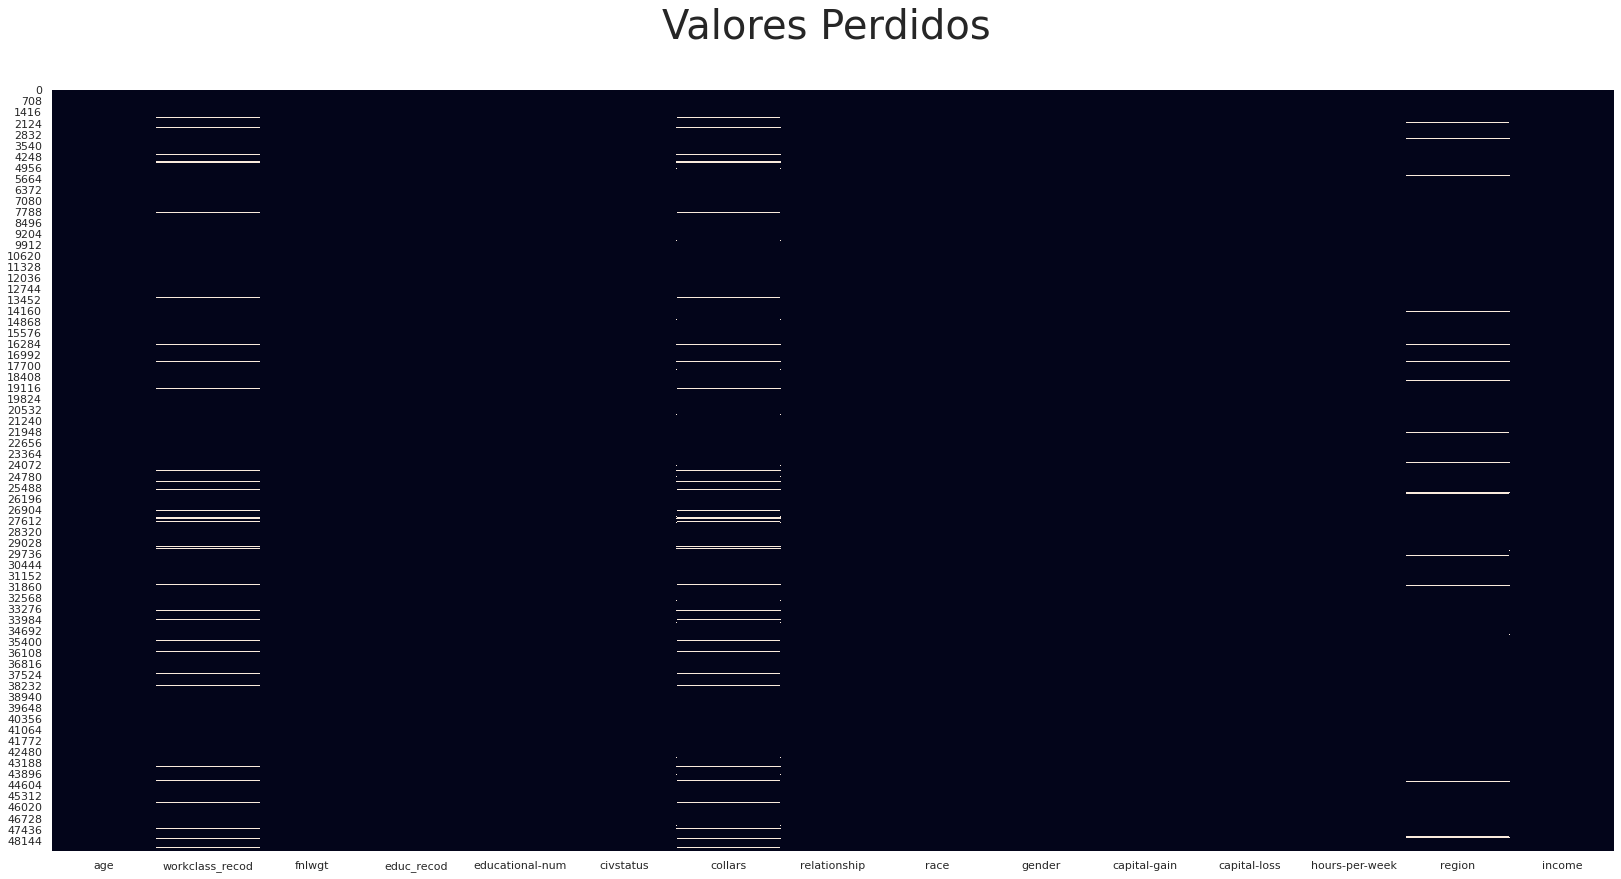

In [27]:
fa.datos_perdidos(df)

Considerando la cantidad de datos totales, los datos perdidos no son significativos